In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%precision 4
plt.rcParams['font.family'] = 'AppleGothic'

In [9]:
def p_corr(x,y):
    x_dev = x - np.mean(x)
    y_dev = y - np.mean(y)
    return np.sum(x_dev * y_dev) / (np.sqrt(np.sum(x_dev**2)) * (np.sqrt(np.sum(y_dev**2))))

In [10]:
x1 = [-1, 0, 1]
y1 = [-4, 1, 3]
x2 = [4, 6, 6, 8, 8, 9, 9, 10, 12, 12]
y2 = [39, 42, 45, 47, 50, 50, 52, 55, 57, 60]

In [12]:
p_corr(x1, y1)

0.9707

In [13]:
p_corr(x2, y2)

0.9775

# 상관분석(Correlation Analysis)

- 목적 : 두 변수간에 선형 관계를 파악


- 산점도(scatterplot)로 시각화


- 상관계수 종류
    - 수치형 변수 : 피어슨(Pearson) 상관계수
    - 서열형 변수 : 스피어만(Spearman) 상관계수, 켄달(Kendall)의 Tau
    - 범주형 변수 : Phi 상관계수, Cramer's V 계수

## 두 변수의 선형관계 시각화

### 예제. iris datatset

In [14]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 1) 산점도(scatterplot)

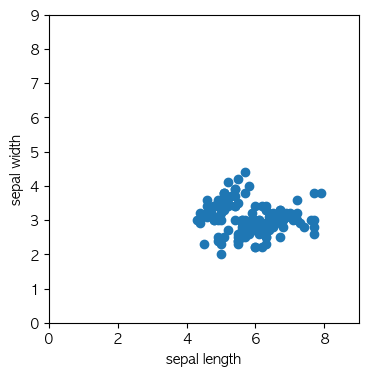

In [24]:
plt.figure(figsize=(4,4))
plt.scatter(iris.sepal_length, iris.sepal_width)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xlim(0,9)
plt.ylim(0,9)
plt.show()

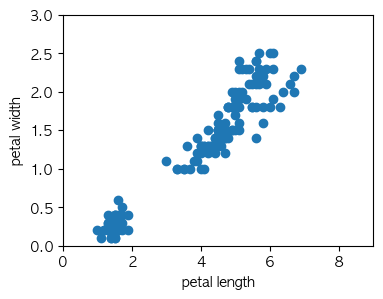

In [29]:
plt.figure(figsize=(4,3))
plt.scatter(iris.petal_length, iris.petal_width)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(0,9)
plt.ylim(0,3)
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

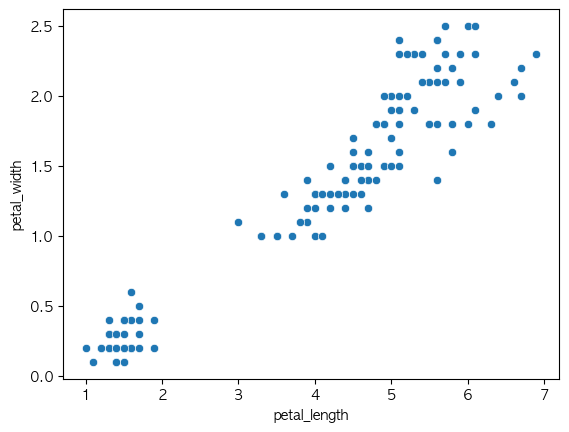

In [30]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width')

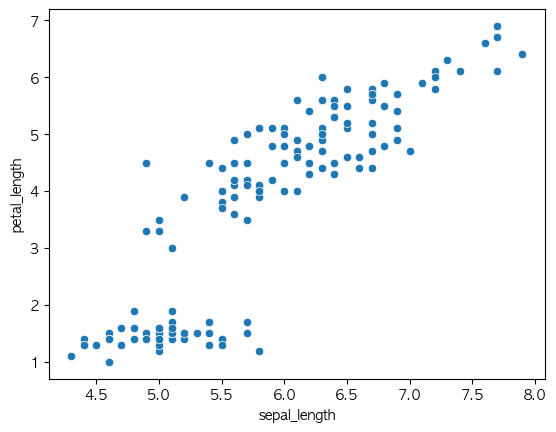

In [32]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length')
plt.show()

### 2) 산점도 행렬(scatter plot matrix)

- 여러 개의 연속형 변수에 대해서 두 변수씩 쌍을 이루는 산점도를 그려 한꺼번에 변수 간 관계를 일목요연하게 볼 수 있음

###  ① seaborn.pairplot()

- 형식 : pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)


- https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

#### pairplot()의 인수를 이용한 산점도 행렬1
- diag_kind='hist'를 설정하여 대각원소 자리에 각 변수별 히스토그램 그리기

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

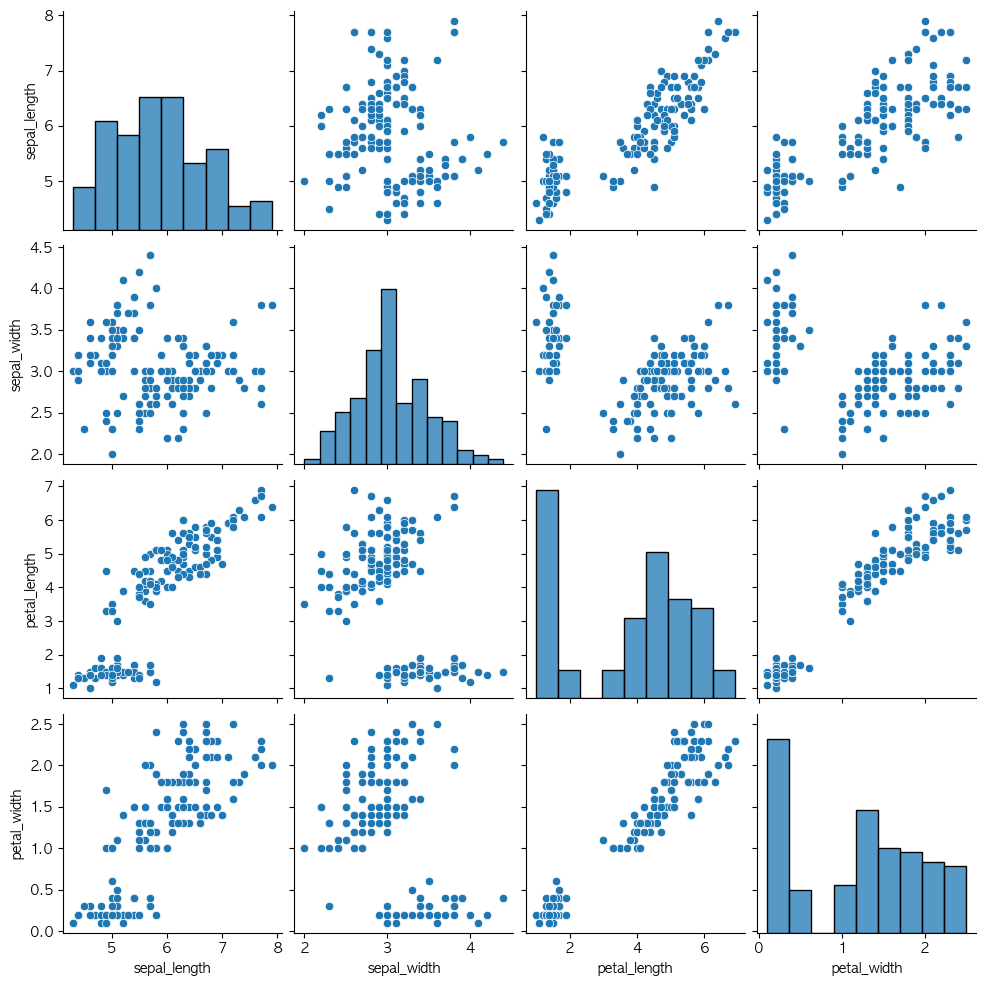

In [33]:
sns.pairplot(data=iris, diag_kind='hist')
plt.show()

#### pairplot()의 인수를 이용한 산점도 행렬2
- diag_kind='kde' : 각 변수별 커널밀도추정곡선 그림
- hue='species' : 'species'(setosa, versicolor, virginica) 별로 색깔을 다르게 표시
- 색깔은 palette 에 'bright', 'pastel', 'deep', 'muted', 'colorblind', 'dark' 중에서 가독성이 좋고 선호하는 색상으로 선택 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

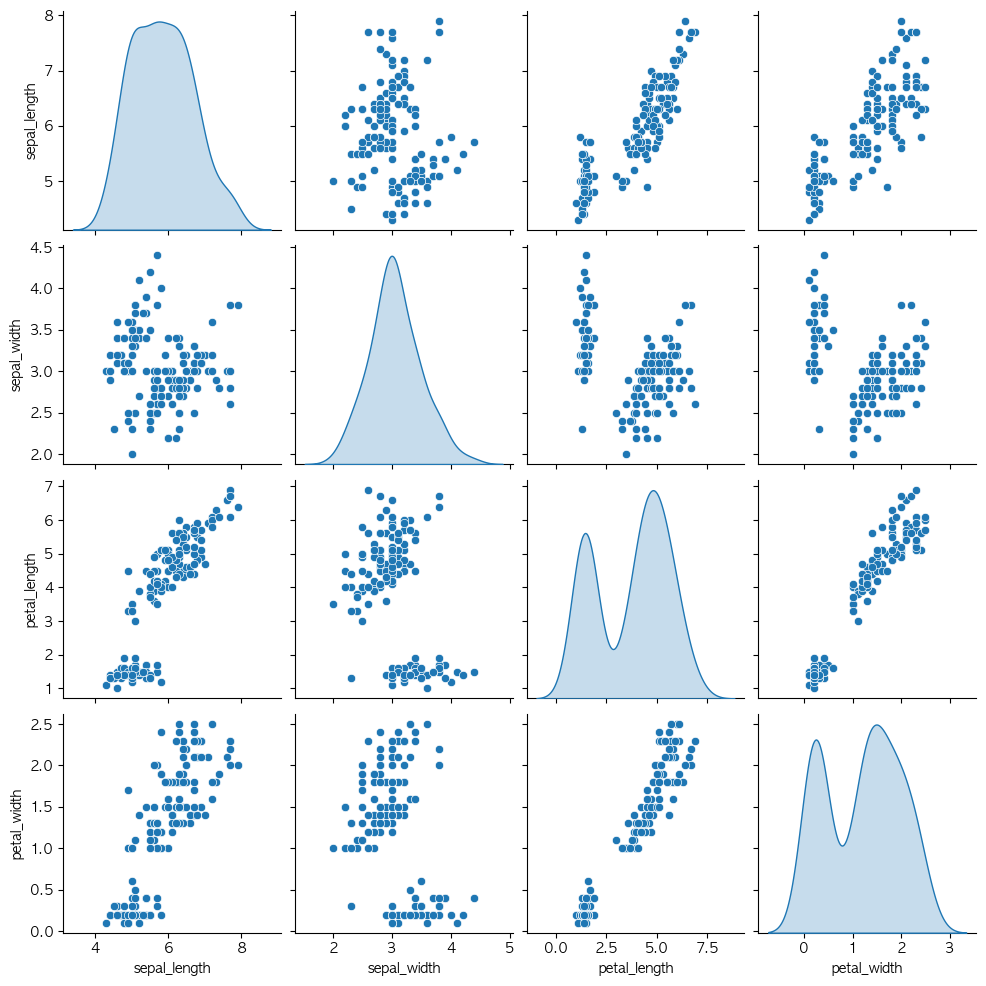

In [34]:
sns.pairplot(iris, diag_kind='kde')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

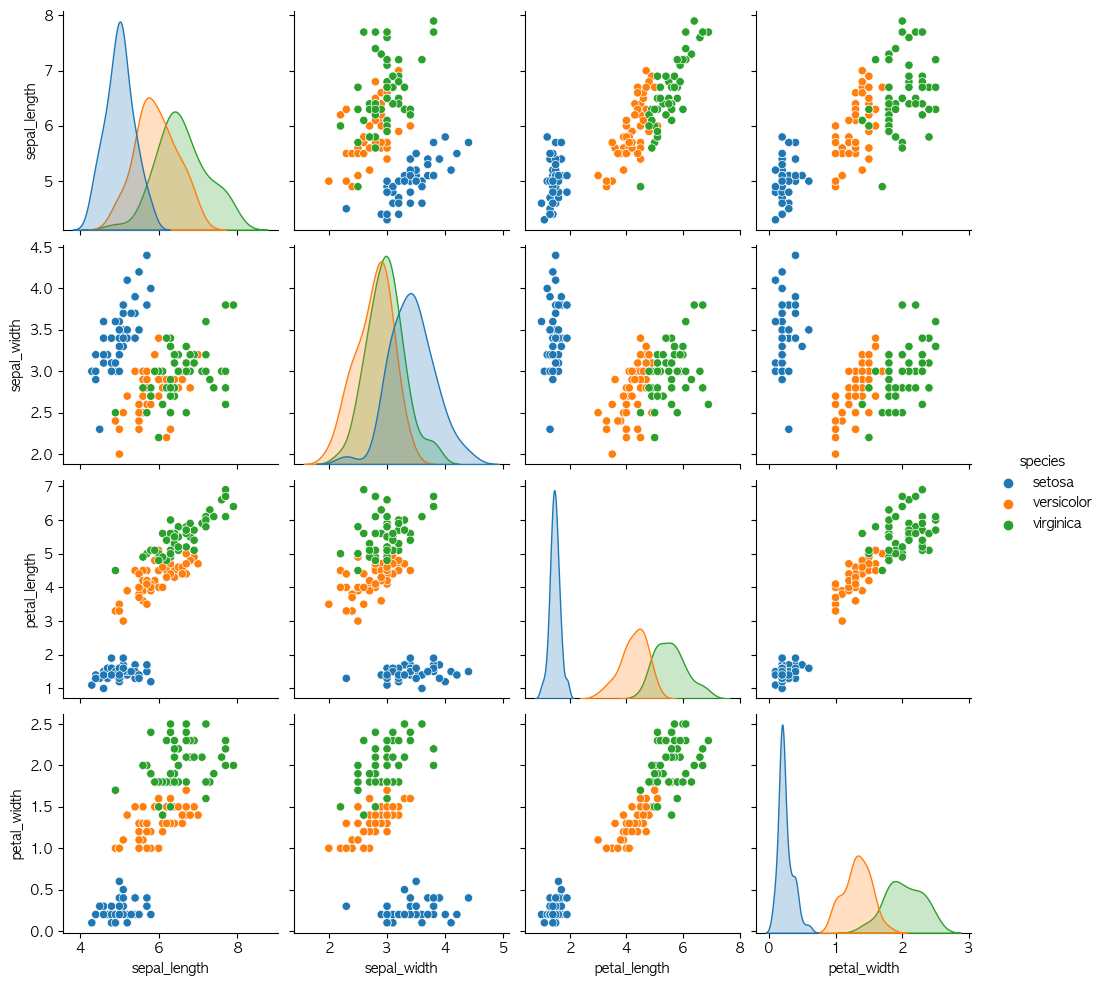

In [35]:
sns.pairplot(iris, diag_kind='kde', hue='species')

### ② pandas.plotting 의 scatter_matrix() 함수

- 형식 : scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwargs)


- https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

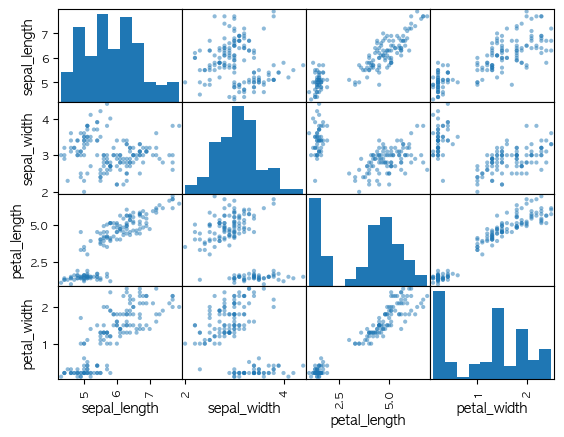

In [36]:
pd.plotting.scatter_matrix(iris)
plt.show()

-----------------------------------------

### 상관계수 계산 함수

#### ① pandas의  corr() 함수
- 형식 : DataFrame.corr(method='pearson', min_periods=1)
    - method : 'pearson', 'kendall', 'spearman'
        - pearson : standard correlation coefficient
        - kendall : Kendall Tau correlation coefficient
        - spearman : Spearman rank correlation
    - min_periods : Minimum number of observations(for Pearson and Spearman correlation)


- 반환값 : 상관계수 행렬(데이터프레임)


- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

#### ② scipy.stats.pearsonr( )함수

- 두 변수의 피어슨 상관계수와 p값


- 형식 : pearsonr(x, y, *, alternative='two-sided')
    - x, y : 1차원
- 반환값 : (피어슨상관계수, p값)


- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

#### ③ scipy.stats.spearmanr( )함수

- Spearman 상관계수와 p값
    - 순서형 척도 간의 상관계수
    - 두 수치형 변수의 정규성 가정이 만족하지 않을 경우 상관계수

- 형식 : spearmanr(a, b=None, axis=0, nan_policy='propagate', alternative='two-sided')
    - a,b : 1차원 또는 2차원 배열
- 반환값 : (Spearman상관계수, p값)


- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

#### ④ scipy.stats.kendalltau( )함수

- 두 변수의 Kendall의 tau와 p값
    - 순서형 척도 간의 상관계수

- 형식 : kendalltau(x, y, **kargs, alternative='two-sided')
- 반환값 : (Kendall's tau, p값)


- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

### Pearson Correlation

- 가설
    - 귀무가설(H0): $ \rho = 0$ (두 변수 간에 선형적 상관관계가 없다)
    - 대립가설(H1): $ \rho \ne 0$ (두 변수 간에 선형적 상관관계가 있다)


- 가정 : 두 변수가 이변량 정규분포를 한다
    - 두 변수 중 적어도 하나의 변수는 정규분포일 것

- 상관계수: -1 ~ +1
    - 1에 가까울 수록 양의 상관관계가 강하다고 함
    - -1에 가까울수록 음의 상관관계가 강하다고 함
    - 0에 가까울수록 상관관계가 약하다고 함

#### 예제1

In [37]:
x2 = [4, 6, 6, 8, 8, 9, 9, 10, 12, 12]
y2 = [39, 42, 45, 47, 50, 50, 52, 55, 57, 60]
data = pd.DataFrame({'홍보비': x2, '판매액':y2})
data

,홍보비,판매액
0,4,39
1,6,42
2,6,45
3,8,47
4,8,50
5,9,50
6,9,52
7,10,55
8,12,57
9,12,60


In [38]:
data.corr()

,홍보비,판매액
홍보비,1.000000,0.977532
판매액,0.977532,1.000000


In [39]:
data.corr(method='spearman')

,홍보비,판매액
홍보비,1.000000,0.978503
판매액,0.978503,1.000000


- 상관분석
    - 귀무가설: 모상관계수=0

In [44]:
coef, p = stats.pearsonr(data.판매액, data.홍보비)
print(f'피어슨 상관계수={coef:.4f}, p-value={p:.7f}')

피어슨 상관계수=0.9775, p-value=0.0000011


#### 예제2. iris dataset

In [46]:
#상관계수 행렬 구하기
iris.iloc[:, :-1].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [48]:
import itertools

colnames = list(iris.columns[:-1])
list(itertools.combinations(colnames, 2))

[('sepal_length', 'sepal_width'),
 ('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_width', 'petal_length'),
 ('sepal_width', 'petal_width'),
 ('petal_length', 'petal_width')]

In [49]:
list(itertools.combinations(['사과', '배', '바나나', '딸기', '포도'], 3))

[('사과', '배', '바나나'),
 ('사과', '배', '딸기'),
 ('사과', '배', '포도'),
 ('사과', '바나나', '딸기'),
 ('사과', '바나나', '포도'),
 ('사과', '딸기', '포도'),
 ('배', '바나나', '딸기'),
 ('배', '바나나', '포도'),
 ('배', '딸기', '포도'),
 ('바나나', '딸기', '포도')]

In [51]:
for col1, col2 in itertools.combinations(colnames, 2):
    coef, p = stats.pearsonr(iris[col1], iris[col2])
    print(f'[{col1}, {col2}] pearson corr={coef:.4f}, p-value={p:.4f}')

[sepal_length, sepal_width] pearson corr=-0.1176, p-value=0.1519
[sepal_length, petal_length] pearson corr=0.8718, p-value=0.0000
[sepal_length, petal_width] pearson corr=0.8179, p-value=0.0000
[sepal_width, petal_length] pearson corr=-0.4284, p-value=0.0000
[sepal_width, petal_width] pearson corr=-0.3661, p-value=0.0000
[petal_length, petal_width] pearson corr=0.9629, p-value=0.0000


In [52]:
#Spearman 상관계수
iris.iloc[:, :-1].corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


In [54]:
for col1, col2 in itertools.combinations(colnames, 2):
    coef, p = stats.spearmanr(iris[col1], iris[col2])
    print(f'[{col1}, {col2}] pearson corr={coef:.4f}, p-value={p:.4f}')

[sepal_length, sepal_width] pearson corr=-0.1668, p-value=0.0414
[sepal_length, petal_length] pearson corr=0.8819, p-value=0.0000
[sepal_length, petal_width] pearson corr=0.8343, p-value=0.0000
[sepal_width, petal_length] pearson corr=-0.3096, p-value=0.0001
[sepal_width, petal_width] pearson corr=-0.2890, p-value=0.0003
[petal_length, petal_width] pearson corr=0.9377, p-value=0.0000


#### 예제3. 두 면접관 점수 성향 관련성

In [57]:
scores = pd.DataFrame({'지원자번호':[2,4,5,1,3],
                      'A면접관':[70,75,85,87,93],
                      'B면접관':[74,80,89,81,96]})
scores

,지원자번호,A면접관,B면접관
0,2,70,74
1,4,75,80
2,5,85,89
3,1,87,81
4,3,93,96


In [58]:
scores.set_index('지원자번호', inplace=True)
scores

,A면접관,B면접관
지원자번호,,
2,70,74
4,75,80
5,85,89
1,87,81
3,93,96


In [59]:
stats.spearmanr(scores.A면접관, scores.B면접관)

SignificanceResult(statistic=0.8999999999999998, pvalue=0.03738607346849875)

In [60]:
stats.kendalltau(scores.A면접관, scores.B면접관)

SignificanceResult(statistic=0.7999999999999999, pvalue=0.08333333333333333)

In [61]:
stats.pearsonr(scores.A면접관, scores.B면접관)

PearsonRResult(statistic=0.8753762190648169, pvalue=0.051813808599848035)

-------------------------------

## 상관계수 행렬의 시각화

- 히트맵(heatmap)을 사용

### seaborn의 heatmap() 함수

- 범주형-범주형-수치형 자료의 시각화
    - X축과 Y축에 2개의 범주형 자료의 계급(class)별로 연속형 자료를 집계한 자료의 시각화
- 집계한 값에 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화


- 형식 : heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)


- https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

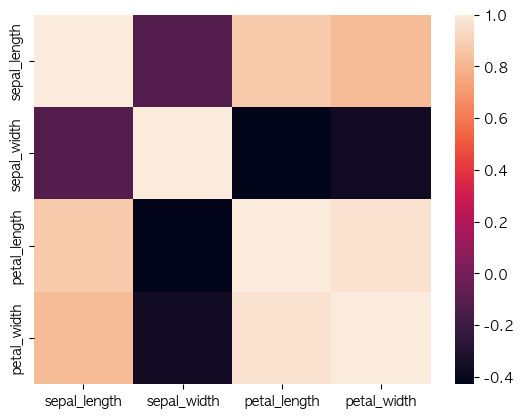

In [65]:
plt.rcParams['axes.unicode_minus'] = False

corr = iris.iloc[:, :-1].corr()
sns.heatmap(corr)
plt.show()

#### heatmap()의 annot, fmt 인수
- annot=True : 히트맵의 각 셀에 값 표시
- fmt='d' or 'f' : 히트맵에 표시하는 값의 서식(format) 지정 (정수, 실수)

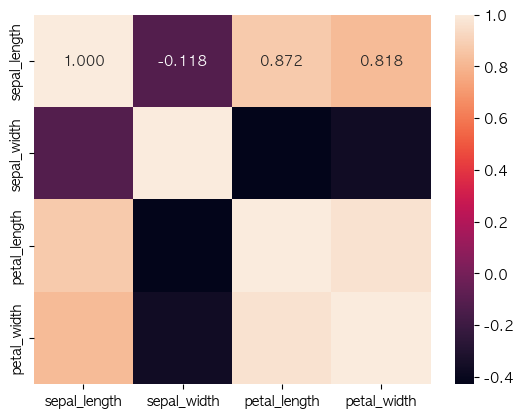

In [66]:
sns.heatmap(corr, annot=True, fmt='.3f')
plt.show()

#### sns.heatmap()함수의 cmap인수 사용하여 다른 color map 지정

- color maps in Matplotlib 링크 참고: 
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

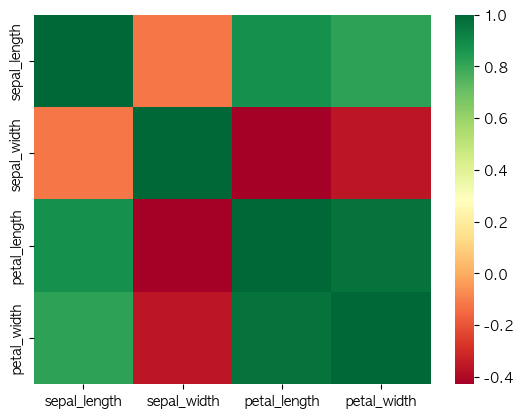

In [70]:
sns.heatmap(corr, cmap='RdYlGn')
plt.show()

---------------------------------

### 연습문제

1. 상관계수에 관한 설명 중 바르지 못한 것은?<br>
① 변수 사이의 상관관계를 측정한다<br>
② 공분산과 두 변수 표준편차의 곱의 비로 표현한다<br>
③ 상관계수는 0과 1 사이의 값을 갖는다<br>
④ 상관계수의 값이 1이면 완전 상관이다

=> 3번 : -1과 1 사이 값을 가짐

상관계수(Correlation Coefficient)는 두 변수 간의 선형 관계를 나타내며, 

그 값은 -1과 1 사이에 있음. 상관계수의 값이 1이면 두 변수는 완전한 양의 선형 관계를 가지며, 

-1이면 완전한 음의 선형 관계를 가집니다. 0이면 두 변수 사이에 선형 관계가 없음을 나타냅니다.

2. 다음 변수들 간의 상관관계 중에서 양의 상관관계인 것은?<br>
① 산의 높이와 기압<br>
② 체중과 신장<br>
③ 월수입과 엥겔계수<br>
④ 수요 또는 공급에 따른 가격변화  

=> 2번: 체중과 신장

- 산의 높이와 기압: 음의 상관관계. 산의 높이가 증가할수록 기압은 감소.
- 체중과 신장: 양의 상관관계. 일반적으로 사람의 신장이 클수록 체중도 증가하는 경향.
- 월수입과 엥겔계수: 음의 상관관계. 엥겔계수는 소득 대비 식료품 지출의 비율을 나타내며, 일반적으로 소득이 증가할수록 엥겔계수는 감소.
- 수요 또는 공급에 따른 가격변화: 수요와 공급에 따라 다르며, 복잡한 상호작용을 가짐. 수요가 증가하면 가격이 오르는 양의 상관관계가 있고, 공급이 증가하면 가격이 내리는 음의 상관관계가 있음.

3. 상관계수 에 대한 설명 중 잘못된 것은?<br>
① 단위를 바꾸더라도 값은 바뀌지 않는다<br>
② $-1 \le r \le 1$ <br>
③ 두 변수 X와 Y를 서로 바꾸어 계산해도 상관계수는 같다<br>
④ 두 변수간의 인과관계를 나타낸다

=> 4번

상관계수는 두 변수 간의 선형 관계의 강도와 방향을 나타내지만, 

인과관계를 나타내지는 않음. 즉, 상관관계가 있다는 것은 

두 변수 간에 어떤 관계가 있다는 것을 의미하지만, 

한 변수가 다른 변수의 원인임을 의미하지는 않음. 

인과관계를 확인하려면 추가적인 연구와 분석이 필요.

4. 데이터 '학생건강검사_초등학생2018.xlsx'를 이용하여 초등학생 6학년의 키와 몸무게에 대한 상관관계를 계산하고, 상관관계가 있다고 말할 수 있는지 유의수준 5%에서 가설검정을 수행하시오.

- 데이터 파악

In [74]:
health = pd.read_excel('data/학생건강검사_초등학생2018.xlsx')
health

,개인ID,도시규모,도시규모별 분석용,광역시도,학교급별,학년,성별,생년월일,건강검진일,키,몸무게
0,212111q,특별/광역시,1,서울,초,1,남,20110302,20180511,124.1,25.3
1,212112w,특별/광역시,1,서울,초,1,남,20110111,20180511,131.1,30.8
2,212113e,특별/광역시,1,서울,초,1,남,20110719,20180511,121.1,27.4
3,212114r,특별/광역시,1,서울,초,1,남,20110330,20180511,122.1,23.1
4,212115t,특별/광역시,1,서울,초,1,남,20111008,20180511,120.0,20.9
...,...,...,...,...,...,...,...,...,...,...,...
17408,8987615g,면지역,2,제주,초,6,남,20060628,20180420,152.0,44.0
17409,8987616h,면지역,2,제주,초,6,남,20060216,20180420,156.0,42.8
17410,8987617j,면지역,2,제주,초,6,남,20060713,20180420,150.0,32.6
17411,8987618k,면지역,2,제주,초,6,남,20060311,20180420,151.0,56.5


In [78]:
six = health[health['학년']==6][['키', '몸무게']]
six

,키,몸무게
45,154.3,67.3
46,140.2,28.5
47,156.3,56.6
48,150.0,53.9
49,144.1,43.3
...,...,...
17408,152.0,44.0
17409,156.0,42.8
17410,150.0,32.6
17411,151.0,56.5


In [87]:
six.corr(method='spearman')

,키,몸무게
키,1.000000,0.629711
몸무게,0.629711,1.000000


- 키와 몸무게에 대한 산점도

<Axes: xlabel='키', ylabel='몸무게'>

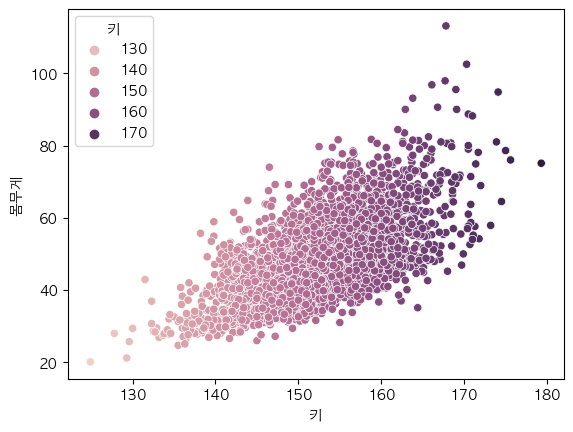

In [85]:
sns.scatterplot(data=six, x='키', y='몸무게', hue='키')

- 상관분석

In [96]:
six.corr(method='spearman')

,키,몸무게
키,1.000000,0.629711
몸무게,0.629711,1.000000


In [97]:
corr = six[['키', '몸무게']].corr()
corr

,키,몸무게
키,1.000000,0.640883
몸무게,0.640883,1.000000


In [91]:
# pearson 상관분석
coef, p = stats.pearsonr(six.키, six.몸무게)
print(f'피어슨 상관계수={coef:.4f}, p-value={p:.7f}')

피어슨 상관계수=0.6409, p-value=0.0000000


In [89]:
# spearman
stats.spearmanr(six.키, six.몸무게)

SignificanceResult(statistic=0.6297112743417747, pvalue=9.419e-320)

In [90]:
# kendall
stats.kendalltau(six.키, six.몸무게)

SignificanceResult(statistic=0.4510206413830208, pvalue=6.4014620050067916e-288)